In [1]:
# Econ 277: Data Day 1
# Author: Jonah Tuckman
# Date: February 4, 2019
# Location: ~/Desktop/Economics/Economics-Data-Exploration/DataDay1
# Purpose: Going through process of building python code
####################################################################


In [3]:
import pandas as pd ## Pandas is a great package for dealing with datasets
import numpy as np ## numpy great for array and vector work
import matplotlib.pyplot as plt ## will be used for plotting (clearly)
import os ## misscelaneous operating system interface
import matplotlib
#matplotlib.use('GTKAgg')
from sklearn import datasets, linear_model

In [4]:
os.chdir('/Users/JonahTuckman/Desktop/Economics/Economics-Data-Exploration/DataDay1')
## This line sets the working directory to the local path on my machine

In [5]:
# Questions for you to check your understand: 
# What is the difference between a working directory and these other directories? 
### A working dirrectory is where your script is locally run thus paths will be
### according to this file

# What is the ~ doing? 
### ~ makes is a global command and links any file to find this

# What is the <- doing?
### Pointer assignment in R.

In [6]:
dataset = pd.read_csv('RawData/DataSet1_AgricFarmVal.csv') # reading datafile and 
                                                        # attatching to variable dataset

In [8]:
dataset.head() # Shows the first five rows of the dataset

,FIPS,NAME,YEAR,FAVAL,LEVEL
0,9000,CONNECTICUT,1850,31.0,2
1,9000,CONNECTICUT,1860,36.0,2
2,9000,CONNECTICUT,1870,42.0,2
3,9000,CONNECTICUT,1880,49.0,2
4,9000,CONNECTICUT,1890,42.0,2


In [9]:
print(dataset)

        FIPS         NAME  YEAR  FAVAL  LEVEL
0       9000  CONNECTICUT  1850   31.0      2
1       9000  CONNECTICUT  1860   36.0      2
2       9000  CONNECTICUT  1870   42.0      2
3       9000  CONNECTICUT  1880   49.0      2
4       9000  CONNECTICUT  1890   42.0      2
5       9000  CONNECTICUT  1900   42.0      2
6       9000  CONNECTICUT  1910   63.0      2
7       9000  CONNECTICUT  1920  100.0      2
8       9000  CONNECTICUT  1925  110.0      2
9       9000  CONNECTICUT  1930  151.0      2
10      9000  CONNECTICUT  1935  136.0      2
11      9000  CONNECTICUT  1940  135.0      2
12      9000  CONNECTICUT  1945  165.0      2
13      9000  CONNECTICUT  1950  248.0      2
14      9000  CONNECTICUT  1954  289.0      2
15      9000  CONNECTICUT  1959  430.0      2
16      9001    FAIRFIELD  1850   49.0      1
17      9001    FAIRFIELD  1860   53.0      1
18      9001    FAIRFIELD  1870   91.0      1
19      9001    FAIRFIELD  1880   85.0      1
20      9001    FAIRFIELD  1890   

In [10]:
# what type of data is this? 
### This data is 4 columns of numerical data and one columns of categorical data

# What is a unit of observation? 
### Name is the changing categorical column

# Another way to ask that question is to ask, what is the data unique by?
### Name?

In [12]:
total_rows = dataset.count
print(total_rows) # shows [49936 rows x 5 columns]

<bound method DataFrame.count of         FIPS         NAME  YEAR  FAVAL  LEVEL
0       9000  CONNECTICUT  1850   31.0      2
1       9000  CONNECTICUT  1860   36.0      2
2       9000  CONNECTICUT  1870   42.0      2
3       9000  CONNECTICUT  1880   49.0      2
4       9000  CONNECTICUT  1890   42.0      2
5       9000  CONNECTICUT  1900   42.0      2
6       9000  CONNECTICUT  1910   63.0      2
7       9000  CONNECTICUT  1920  100.0      2
8       9000  CONNECTICUT  1925  110.0      2
9       9000  CONNECTICUT  1930  151.0      2
10      9000  CONNECTICUT  1935  136.0      2
11      9000  CONNECTICUT  1940  135.0      2
12      9000  CONNECTICUT  1945  165.0      2
13      9000  CONNECTICUT  1950  248.0      2
14      9000  CONNECTICUT  1954  289.0      2
15      9000  CONNECTICUT  1959  430.0      2
16      9001    FAIRFIELD  1850   49.0      1
17      9001    FAIRFIELD  1860   53.0      1
18      9001    FAIRFIELD  1870   91.0      1
19      9001    FAIRFIELD  1880   85.0      1
2

In [13]:
# total FAVAL rows
total_faval = dataset['FAVAL'].count
print(total_faval)

<bound method Series.count of 0         31.0
1         36.0
2         42.0
3         49.0
4         42.0
5         42.0
6         63.0
7        100.0
8        110.0
9        151.0
10       136.0
11       135.0
12       165.0
13       248.0
14       289.0
15       430.0
16        49.0
17        53.0
18        91.0
19        85.0
20        83.0
21        82.0
22       148.0
23       226.0
24       232.0
25       473.0
26       396.0
27       448.0
28       576.0
29       720.0
         ...  
49906      NaN
49907      NaN
49908      NaN
49909     14.0
49910     50.0
49911     98.0
49912     62.0
49913     62.0
49914     42.0
49915     50.0
49916     79.0
49917    135.0
49918    156.0
49919    194.0
49920      NaN
49921      NaN
49922      NaN
49923      NaN
49924      NaN
49925      9.0
49926    138.0
49927    166.0
49928    126.0
49929    134.0
49930     70.0
49931     51.0
49932     86.0
49933    113.0
49934    187.0
49935    313.0
Name: FAVAL, Length: 49936, dtype: float64>


In [14]:
# plt.plot(dataset['NAME'], label = 'Counties')
np.nan_to_num(dataset)
np.nan_to_num(dataset['FAVAL'])
dataset.isnull().sum().sum()

5582

In [15]:
nan_rows = dataset[dataset['FAVAL'].isnull()]
print(nan_rows)

        FIPS         NAME  YEAR  FAVAL  LEVEL
176    23003    AROOSTOOK  1850    NaN      1
256    23013         KNOX  1850    NaN      1
336    23023    SAGADAHOC  1850    NaN      1
1552   34039        UNION  1850    NaN      1
1632   36005        BRONX  1850    NaN      1
1633   36005        BRONX  1860    NaN      1
1634   36005        BRONX  1870    NaN      1
1635   36005        BRONX  1880    NaN      1
1636   36005        BRONX  1890    NaN      1
1637   36005        BRONX  1900    NaN      1
1638   36005        BRONX  1910    NaN      1
1645   36005        BRONX  1950    NaN      1
1646   36005        BRONX  1954    NaN      1
1647   36005        BRONX  1959    NaN      1
2064   36059       NASSAU  1850    NaN      1
2065   36059       NASSAU  1860    NaN      1
2066   36059       NASSAU  1870    NaN      1
2067   36059       NASSAU  1880    NaN      1
2068   36059       NASSAU  1890    NaN      1
2089   36061     NEW YORK  1930    NaN      1
2090   36061     NEW YORK  1935   

In [16]:
county_data = dataset.query('LEVEL == 1')

In [17]:
x = county_data['YEAR'].values # done with .values to keep it in type int rather than a series
perc = len(x) * .8 # 80% of length is standard in training regression models
print(perc)

39334.4


In [18]:
x = x.reshape(len(x), 1) # need to be a 1d array for regression prediction

In [19]:
y = county_data['FAVAL'].values # done with .values to keep it in type float rather than a series
y = y.reshape(len(y), 1)

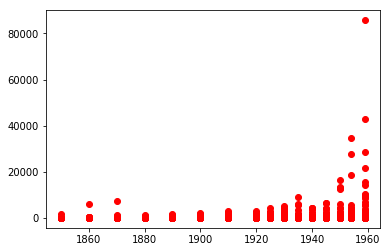

In [20]:
plt.scatter(county_data['YEAR'], county_data['FAVAL'], c = 'RED')

In [25]:
x_train = x[:39335] # Creating x variable train set of first 80%
#x_train = np.nan_to_num(x_train) # removing nan 
np.isnan(x_train).sum() # checking if there are any nan

0

In [26]:
np.shape(x_train)

(39335, 1)

In [27]:
x_test = x[39335:] # creating x variable test set for last 20%
#x_test = np.nan_to_num(x_test) # removing nan
np.isnan(x_test).sum() # checking if there are nan

0

In [28]:
np.shape(x_test)

(9833, 1)

In [29]:
y_train = y[:39335] # creating y variable to train on first 80%
y_train = np.nan_to_num(y_train)
np.isnan(y_train).sum()

0

In [30]:
np.shape(y_train)

(39335, 1)

In [31]:
y_test = y[39335:]
y_test = np.nan_to_num(y_test)
np.isnan(y_test).sum()

0

In [32]:
np.shape(y_test)

(9833, 1)

In [33]:
regression = linear_model.LinearRegression()
regression.fit(x_train, y_train)
prediction = regression.predict(x_test)
predict_point = regression.predict([[1980]])

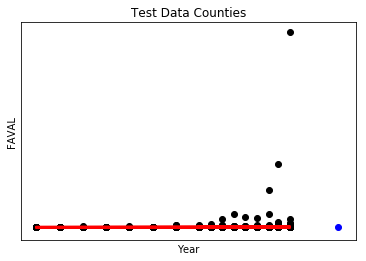

In [35]:
plt.scatter(x_test, y_test, color = 'BLACK')
plt.title('Test Data Counties')
plt.xlabel('Year')
plt.ylabel('FAVAL')
plt.xticks(())
plt.yticks(())
plt.plot(x_test, prediction, color = 'RED', linewidth = 3)
plt.scatter(1980,predict_point, color = 'BLUE')
plt.show()

In [36]:
CPI_Data = pd.read_csv('RawData/AnnualCPI_1800_2017.csv')
CPI_Data.columns = ['YEAR','Annual Average']
